# Pepperidge Farm Orders

This notebook looks at the PF orders to resupply the distribution warehouse

In [1]:
import pandas as pd
import humanize
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('../data/raw_data/PF_ordered_vs_received.xlsx', parse_dates=True, index_col='delivery_date')
data.sort_index(inplace=True)
data

,num_cases_ordered,num_cases_received,value_ordered,value_received
delivery_date,,,,
2021-05-28,1633.0,1497.0,68118.05,61554.05
2021-06-04,925.0,678.0,38736.31,28092.83
2021-06-11,1168.0,924.0,49478.94,38525.14
2021-06-18,1051.0,925.0,43548.93,37578.77
2021-06-25,1472.0,1118.0,59501.10,43949.76
2021-07-02,1165.0,934.0,48513.41,37636.16
2021-07-09,1286.0,987.0,53810.27,41950.11
2021-07-16,1441.0,1079.0,58624.61,44290.00
2021-07-23,1894.0,1389.0,80313.36,61484.06


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40 entries, 2021-05-28 to 2022-02-25
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   num_cases_ordered   40 non-null     float64
 1   num_cases_received  40 non-null     float64
 2   value_ordered       40 non-null     float64
 3   value_received      40 non-null     float64
dtypes: float64(4)
memory usage: 1.6 KB


In [4]:
cases_ordered = int(data['num_cases_ordered'].sum())
cases_received = int(data['num_cases_received'].sum())
value_ordered = data['value_ordered'].sum()
value_received = data['value_received'].sum()

In [5]:
print(' Number of Cases Ordered: ', humanize.intcomma(cases_ordered))
print('Number of Cases Received: ', humanize.intcomma(cases_received))
print('Missing Cases: ', humanize.intcomma(cases_ordered - cases_received))

print('')

print(' Value Ordered: ', humanize.intcomma(value_ordered))
print('Value Received: ', humanize.intcomma(value_received))
print('Value Lost: ', humanize.intcomma(value_ordered - value_received))
print('Profit Lost: ', humanize.intcomma((value_ordered - value_received) * .2))

 Number of Cases Ordered:  78,379
Number of Cases Received:  38,810
Missing Cases:  39,569

 Value Ordered:  3,422,699.04
Value Received:  1,680,543.67
Value Lost:  1,742,155.37
Profit Lost:  348,431.074


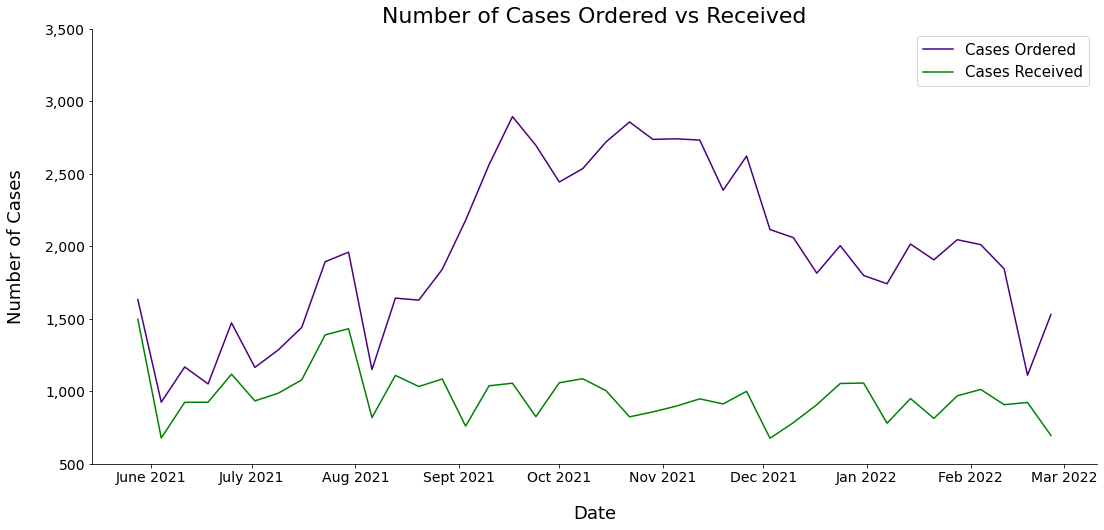

In [6]:
plt.figure(figsize=(18,8))

plt.plot(data['num_cases_ordered'], color='indigo', label='Cases Ordered')
plt.plot(data['num_cases_received'], color='green', label='Cases Received')

xlocs, labels = plt.xticks()
xlabels = ['June 2021', 'July 2021', 'Aug 2021', 'Sept 2021', 'Oct 2021', 'Nov 2021', 'Dec 2021', 'Jan 2022', 'Feb 2022', 'Mar 2022']
plt.xticks(fontsize=14, ticks=xlocs, labels=xlabels)

ylocs, labels = plt.yticks()
ylabels = [humanize.intcomma(int(label)) for label in plt.yticks()[0]]
plt.yticks(fontsize=14, ticks=ylocs, labels=ylabels)

plt.title('Number of Cases Ordered vs Received', fontsize=22)
plt.xlabel('Date', fontsize=18, labelpad=20)
plt.ylabel('Number of Cases', fontsize=18, labelpad=20)

sns.despine()
plt.legend(prop={'size': 15})

plt.savefig('../images/pf_orders.png');

There is clearly a demand, but the supply is lacking. This is causing profits to decrease.